# <font color = #4854E8> Hierarchical clustering </font>

Hierarchical clustering is a general family of clustering algorithms that build nested clusters by merging or splitting them successively. This hierarchy of clusters is represented as a tree (or dendrogram). The root of the tree is the unique cluster that gathers all the samples, the leaves being the clusters with only one sample.

## Type of Hierarchical clustering
- 1. Agglomerative — Bottom up approach. Start with many small clusters and merge them together to create bigger clusters.
- 2. Divisive — Top down approach. Start with a single cluster than break it up into smaller clusters.

## How it works?

<div>
<img src="https://raw.githubusercontent.com/rauzansumara/introduction-to-machine-learning/master/Images/clustering5.png" width="600"/>
</div>

The AgglomerativeClustering object performs a hierarchical clustering using a bottom up approach: each observation starts in its own cluster, and clusters are successively merged together. The linkage criteria determines the metric used for the merge strategy:

## How to identify if two clusters are similar? -> Measure of distance (similarity)

The distance between two clusters can be computed based on the length of the straight line drawn from one cluster to another. This is commonly known as the Euclidean distance.nOther than Euclidean distance, several other metrics have been developed to measure distance such as Manhattan Distance and Minkowski Distance.

<div>
<img src="https://raw.githubusercontent.com/rauzansumara/introduction-to-machine-learning/master/Images/image3.JPG" width="1100"/>
</div>

The choice of distance metrics should be based on the field of study or the problem that you are trying to solve.



## Linkage Criterion

After selecting a distance metric, it is necessary to determine from where distance is computed. Some of the common linkage methods are:

- **Single-Linkage**: Single linkage or nearest linkage is the shortest distance between a pair of observations in two clusters.  
<div>
<img src="https://raw.githubusercontent.com/rauzansumara/introduction-to-machine-learning/master/Images/clustering6.gif" width="350"/>
</div>

$$
D(A,B) = \textrm min(d(x,y)) \\where\\ x \in A, y \in B
$$

- **Complete-linkage**: Complete linkage or farthest linkage is the farthest distance between a pair of observations in two clusters.
<div>
<img src="https://raw.githubusercontent.com/rauzansumara/introduction-to-machine-learning/master/Images/clustering7.gif" width="350"/>
</div>

$$
D(A,B) = \textrm max(d(x,y)) \\where\\ x \in A, y \in B
$$

- **Average-linkage**: Average linkage is the distance between each observation in one cluster to every observation in the other cluster.
<div>
<img src="https://raw.githubusercontent.com/rauzansumara/introduction-to-machine-learning/master/Images/clustering8.gif" width="350"/>
</div>

$$
D(A,B) = \frac{\sum_{i=1}^n \sum_{j=1}^m d(x_k, y_l)}{n*m} \\where\\ x \in A, y \in B
$$

- **Ward’s-linkage**: Ward’s method or minimum variance method or Ward’s minimum variance clustering method calculates the distance between two clusters as the increase in the error sum of squares after merging two clusters into a single cluster. This method seeks to choose the successive clustering steps so as to minimize the increase in sum of squares error at each step.

<div>
<img src="https://raw.githubusercontent.com/rauzansumara/introduction-to-machine-learning/master/Images/clustering9.png" width="500"/>
</div>

# <font color = #4854E8> Perform Agglomerative Clustering in Python </font>

Text(0, 0.5, 'X2')

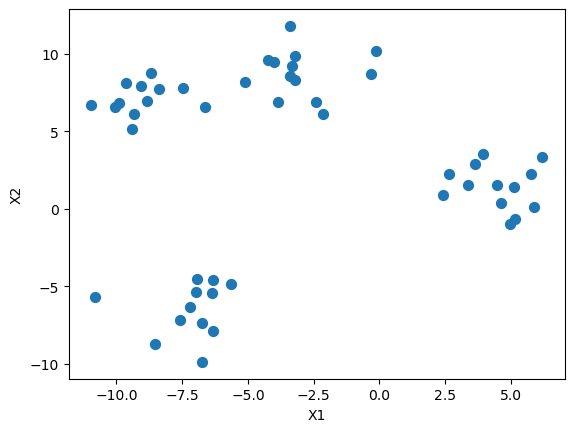

In [1]:
# import packages
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# create syntetic dataset
X, y_true = make_blobs(
                    n_samples=50,
                    centers=4,
                    cluster_std=1.50,
                    random_state=42
                    )

# plot data
plt.scatter(X[:, 0], X[:, 1], s=50);
plt.xlabel('X1')
plt.ylabel('X2')

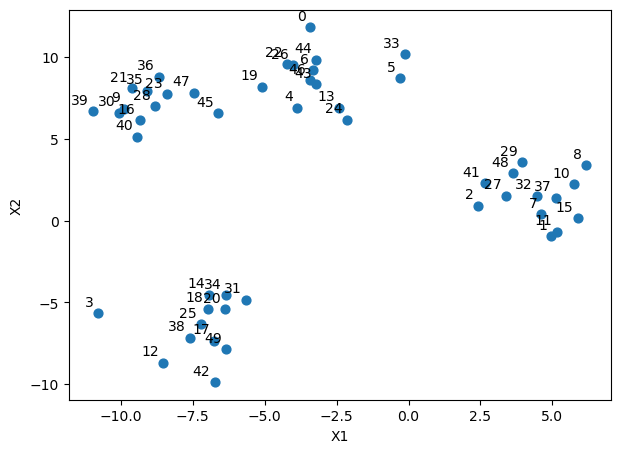

In [8]:
# plot data
plt.figure(figsize=(7, 5))
plt.subplots_adjust(bottom=0.1)
plt.scatter(X[:,0],X[:,1], s=40)
plt.xlabel('X1')
plt.ylabel('X2')

# annotate data
index = range(len(X))
for id, x, y in zip(index, X[:, 0], X[:, 1]):
    plt.annotate(
        id,
        xy=(x, y), xytext=(-3, 3),
        textcoords='offset points', ha='right', va='bottom')
plt.show()

## Create a dendrogram : Single Linkege

We start by importing the library that will help to create dendrograms. Dendrogram helps to give a rough idea of the number of clusters.

Text(0, 0.5, 'Euclidean distance')

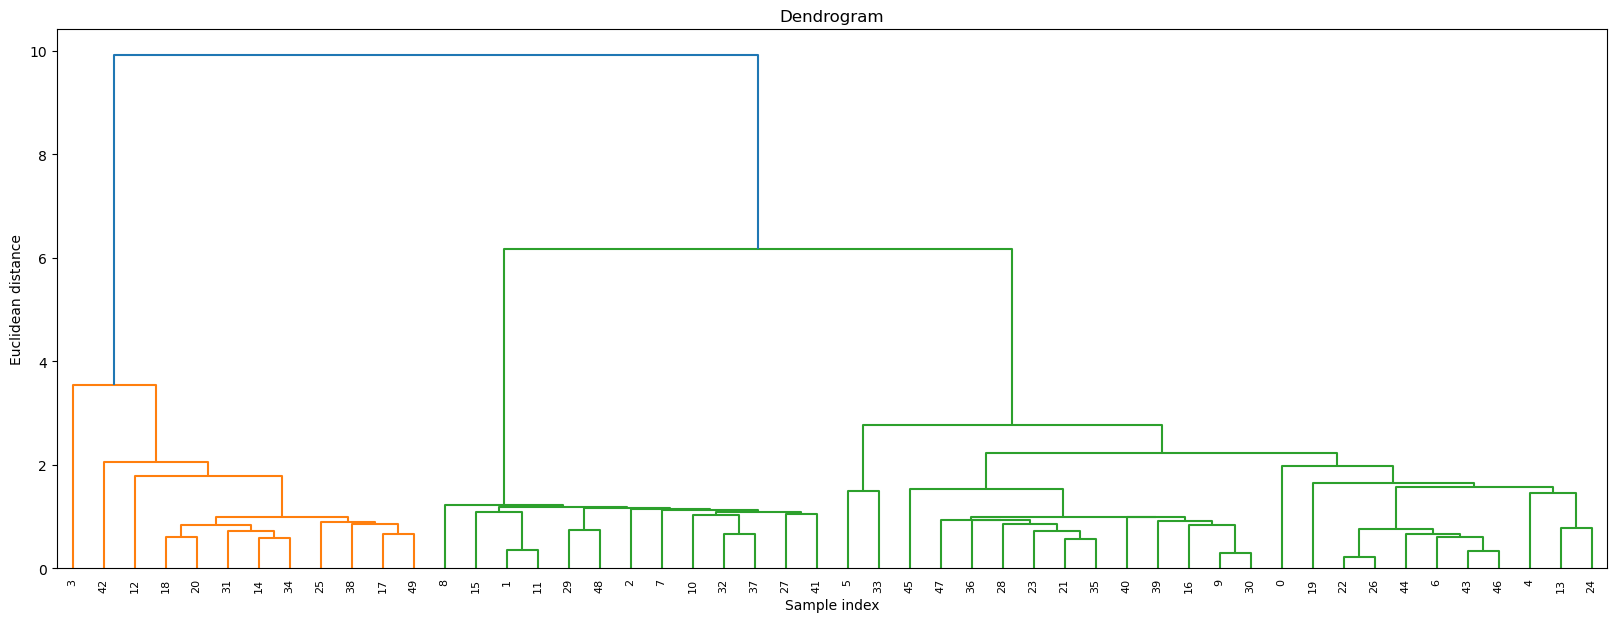

In [3]:
# import package
import scipy.cluster.hierarchy as sc

# Plot dendrogram
plt.figure(figsize=(20, 7))

# Create dendrogram
sc.dendrogram(sc.linkage(X, method='single', metric='euclidean'))
plt.title('Dendrogram')
plt.xlabel('Sample index')
plt.ylabel('Euclidean distance')

Text(0, 0.5, 'Euclidean distance')

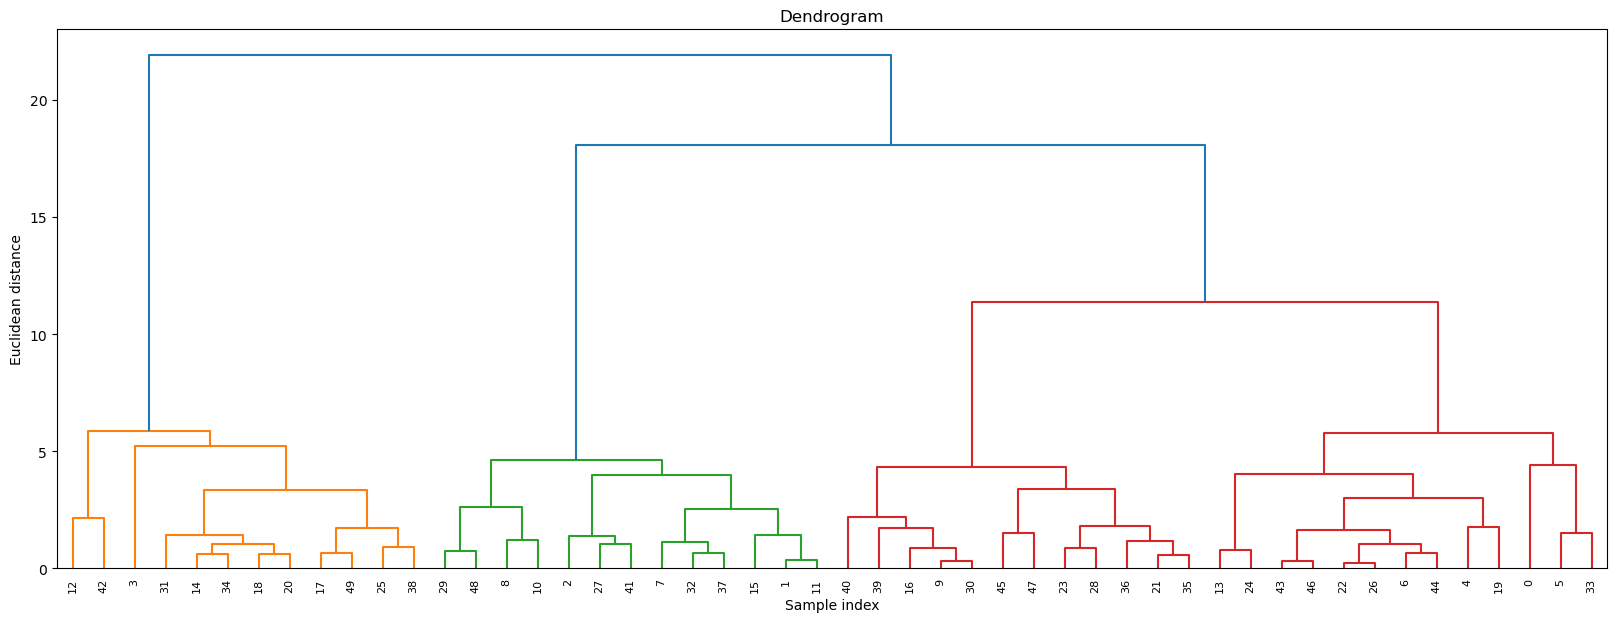

In [4]:
# Plot Settings
plt.figure(figsize=(20, 7))

# Create dendrogram
sc.dendrogram(sc.linkage(X, method='complete', metric='euclidean'))
plt.title('Dendrogram')
plt.xlabel('Sample index')
plt.ylabel('Euclidean distance')
#plt.axhline(y=5, color='r', linestyle='-')

## Fit the model
We instantiate the AgglomerativeClustering and pass euclidean distance as the measure of the distance between points and ward linkage to calculate clusters' proximity. Then we fit the model on our data points. Finally, we return an array of integers where the values correspond to the distinct categories using lables_ property.

In [5]:
# import package
from sklearn.cluster import AgglomerativeClustering

# perform AgglomerativeClustering with complete linkage
cluster = AgglomerativeClustering(
    n_clusters=4, affinity='euclidean', linkage='complete')

# fit model
cluster.fit(X)
pred_labels = cluster.labels_
pred_labels

array([1, 2, 2, 0, 1, 1, 1, 2, 2, 3, 2, 2, 0, 1, 0, 2, 3, 0, 0, 1, 0, 3,
       1, 3, 1, 0, 1, 2, 3, 2, 3, 0, 2, 1, 0, 3, 3, 2, 0, 3, 3, 2, 0, 1,
       1, 3, 1, 3, 2, 0], dtype=int64)

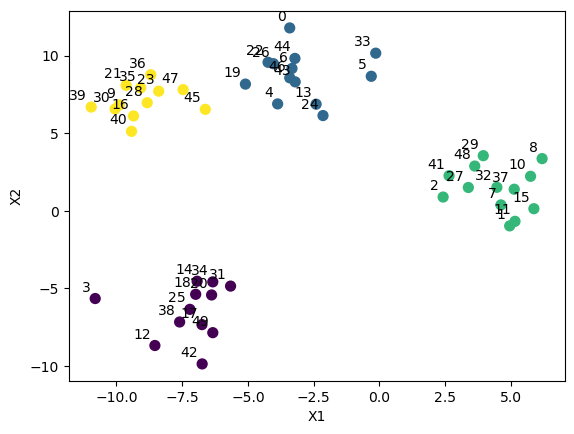

In [10]:
# plot data
#plt.figure(figsize=(10, 7))
plt.scatter(X[:, 0], X[:, 1], c=pred_labels, s=50)
plt.xlabel('X1')
plt.ylabel('X2')

# Let's plot index above data points
index = range(len(X))
for id, x, y in zip(index, X[:, 0], X[:, 1]):
    plt.annotate(
        id,
        xy=(x, y), xytext=(-3, 3),
        textcoords='offset points', ha='right', va='bottom')
plt.show()

you can try different linkage by using **method='complete'** and **method='average'** in **linkage** function

# <font color = #4854E8> The Real Dataset: </font>

This is perhaps the best known database to be found in the pattern recognition literature. The data set contains 3 classes of 50 instances each, where each class refers to a type of iris plant. One class is linearly separable from the other 2; the latter are NOT linearly separable from each other.

Predicted attribute: class of iris plant.

Attribute Information:

1. sepal length in cm
2. sepal width in cm
3. petal length in cm
4. petal width in cm
5. class: Iris Setosa, Iris Versicolour, and Iris Virginica

In [13]:
# import data
import pandas as pd
mydata = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data",
                        names=['sepal length','sepal width','petal length','petal width','class'])

In [14]:
mydata

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [15]:
mydata.iloc[:,:-1]

,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


## Create a dendrogram

Text(0, 0.5, 'Euclidean distance')

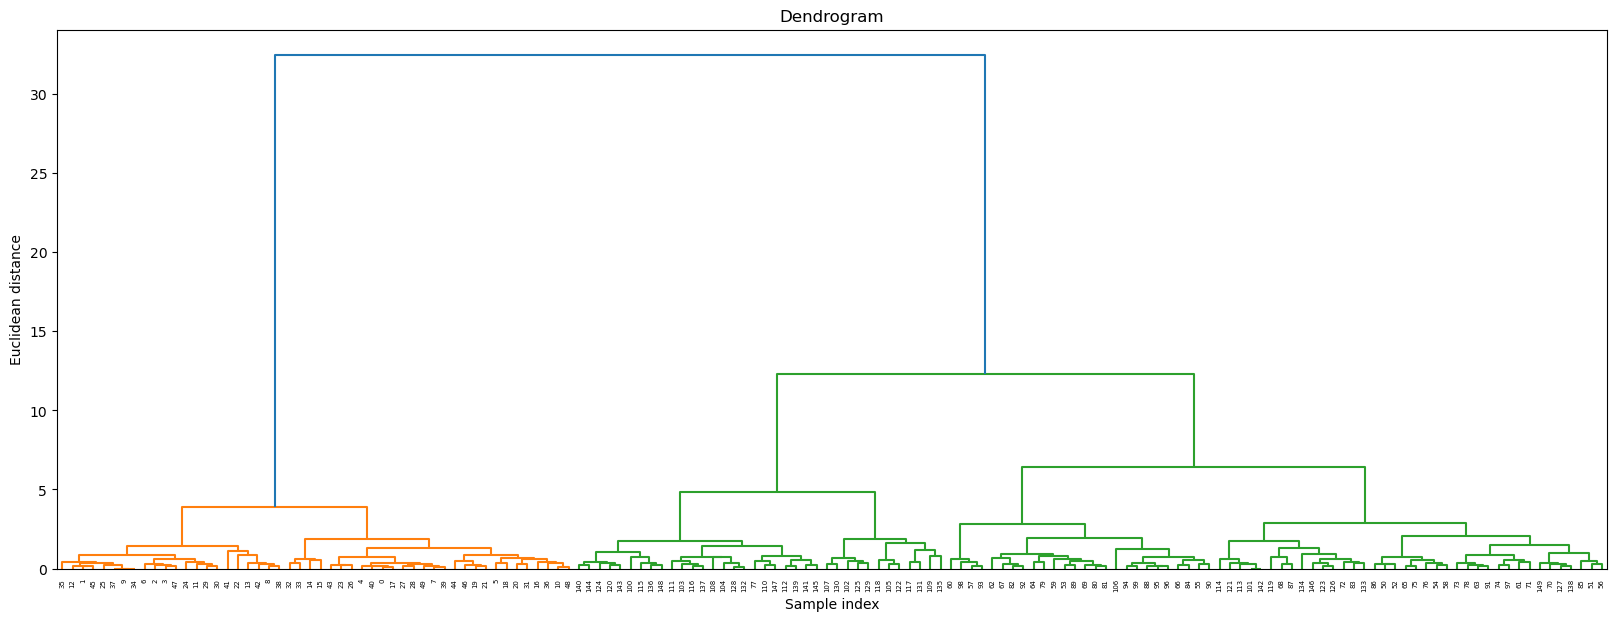

In [16]:
# Plot Setting
plt.figure(figsize=(20, 7))  

# Create dendrogram
sc.dendrogram(sc.linkage(mydata.iloc[:,:-1], method='ward', metric='euclidean'))

plt.title('Dendrogram')
plt.xlabel('Sample index')
plt.ylabel('Euclidean distance')
#plt.axhline(y=10, color='r', linestyle='-')

## Fit the model

In [143]:
# import package
from sklearn.cluster import AgglomerativeClustering

# perform AgglomerativeClustering using ward linkage
cluster = AgglomerativeClustering(
    n_clusters=3, affinity='euclidean', linkage='ward')

# fit model
cluster.fit(mydata.iloc[:,:-1])
y_labels = cluster.labels_
y_labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int64)

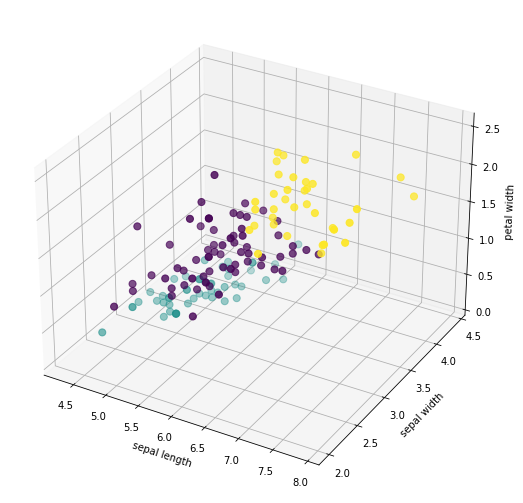

In [145]:
# plot clustering result
fig = plt.figure(figsize=(10,9))
ax = plt.subplot(projection='3d')
ax.scatter3D(mydata['sepal length'], mydata['sepal width'], mydata['petal width'], c=y_labels, s=50)
ax.set_xlabel('sepal length')
ax.set_ylabel('sepal width')
ax.set_zlabel('petal width')
plt.show()

# Comparing different hierarchical linkage methods on synthetic datasets

In [18]:
# import packages
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_circles, make_moons, make_blobs
from sklearn.cluster import AgglomerativeClustering
from itertools import cycle, islice

Generate datasets. We choose the size big enough to see the scalability of the algorithms, but not too big to avoid too long running times

In [19]:
# n generate datasets
n_samples = 1500
# 1st dataset
noisy_circles = make_circles(n_samples=n_samples,  factor=0.5, noise=0.05)
# 2nd dataset
noisy_moons = make_moons(n_samples=n_samples, noise=0.05)
# 3rd dataset
varied = make_blobs(n_samples=n_samples, centers=3, cluster_std=[1.0, 2.5, 0.5], random_state=170) #blobs with varied variances
# 4th dataset
blobs = make_blobs(n_samples=n_samples, centers=3, cluster_std=0.75, random_state=170)

In [20]:
noisy_circles[0]

array([[ 0.40200009,  0.27026756],
       [-0.40481299,  0.35187324],
       [ 0.01471737,  0.53694211],
       ...,
       [ 0.17019448, -0.50525733],
       [-0.87991131, -0.26703255],
       [ 0.2566488 ,  0.43318954]])

## Plotting datasets

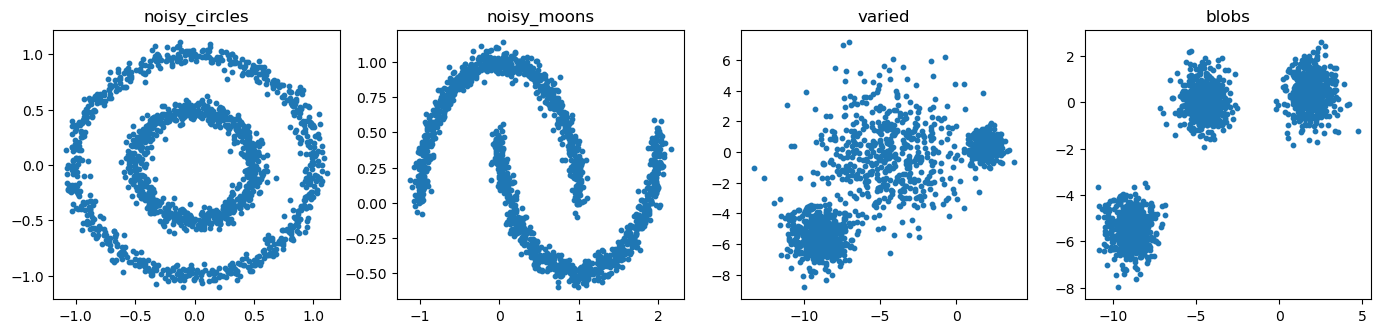

In [23]:
# set up the figures
figures, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(17,3.5))

# For noisy_circles
ax1.scatter(noisy_circles[0][:, 0], noisy_circles[0][:, 1], s=10)
ax1.set_title("noisy_circles")

# For noisy_moons
ax2.scatter(noisy_moons[0][:, 0], noisy_moons[0][:, 1], s=10)
ax2.set_title("noisy_moons")

# For varied
ax3.scatter(varied[0][:, 0], varied[0][:, 1], s=10)
ax3.set_title("varied")

# For blobs
ax4.scatter(blobs[0][:, 0], blobs[0][:, 1], s=10)
ax4.set_title("blobs")

plt.show()

Run the clustering and plot:

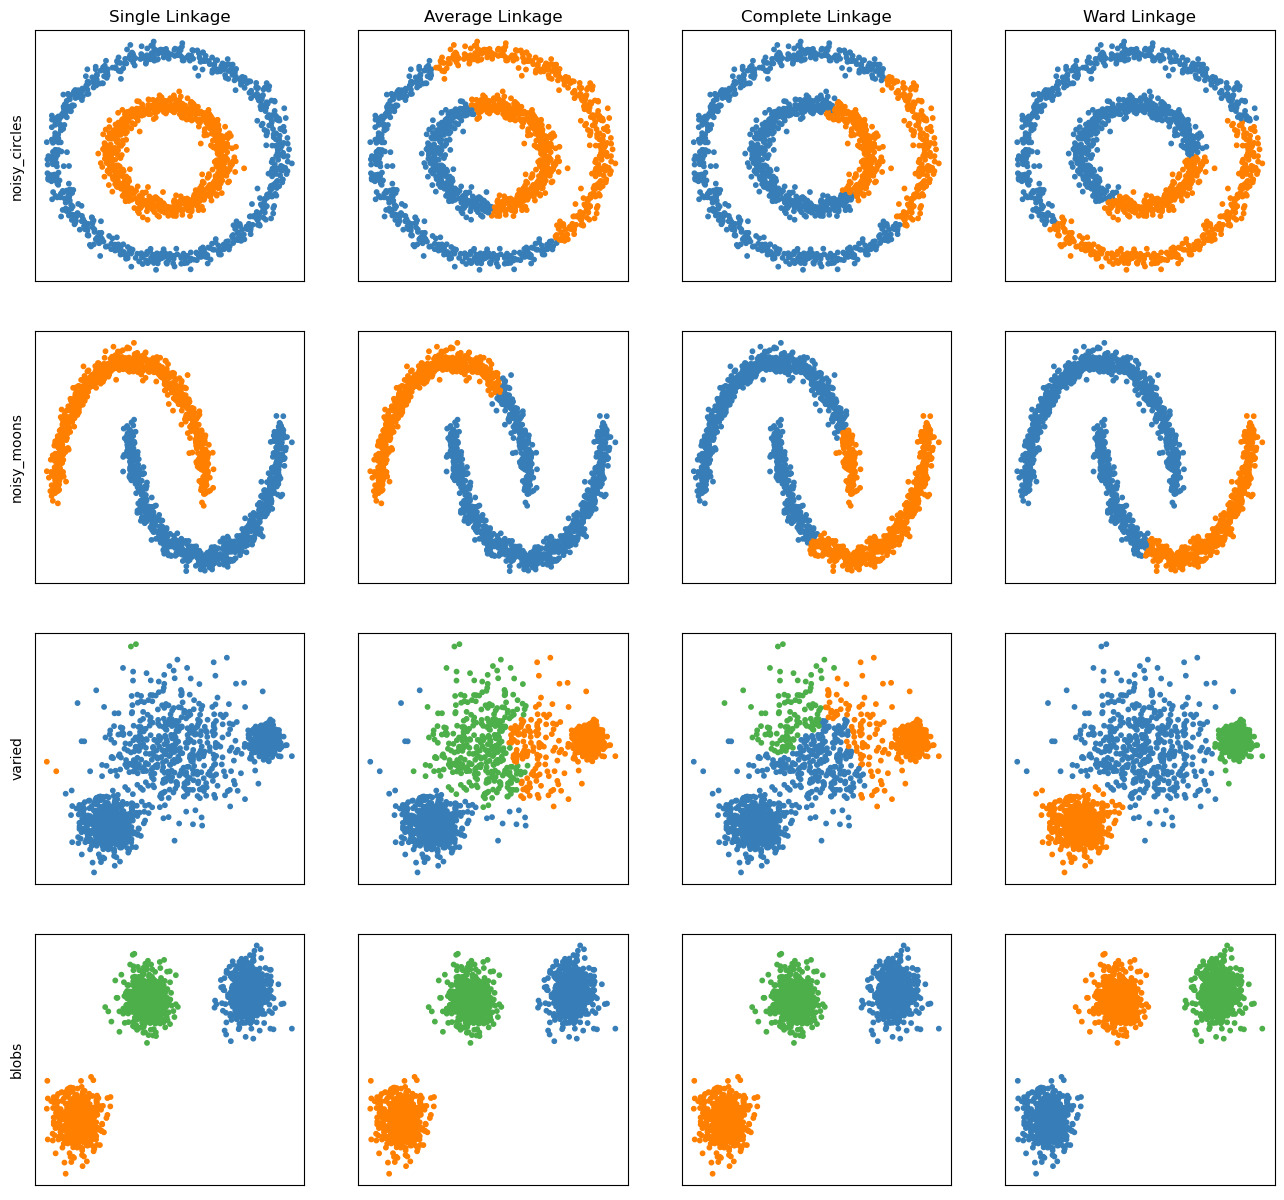

In [31]:
# Set up figure
plt.figure(figsize=(16, 15))

plot_num = 1

datasets = [
    (noisy_circles, 'noisy_circles', {"n_clusters": 2}),
    (noisy_moons, 'noisy_moons', {"n_clusters": 2}),
    (varied, 'varied', {"n_clusters": 3}),
    (blobs, 'blobs', {"n_clusters": 3}),
]

for i_dataset, (dataset, name_dataset, algo_params) in enumerate(datasets):
    
    # define Input X and output y
    X, y = dataset

    # Create cluster objects
    ward = AgglomerativeClustering(
        n_clusters=algo_params["n_clusters"], linkage="ward"
    )
    complete = AgglomerativeClustering(
        n_clusters=algo_params["n_clusters"], linkage="complete"
    )
    average = AgglomerativeClustering(
        n_clusters=algo_params["n_clusters"], linkage="average"
    )
    single = AgglomerativeClustering(
        n_clusters=algo_params["n_clusters"], linkage="single"
    )

    clustering_algorithms = (
        ("Single Linkage", single),
        ("Average Linkage", average),
        ("Complete Linkage", complete),
        ("Ward Linkage", ward),
    )

    for name, algorithm in clustering_algorithms:

        # Fit model
        algorithm.fit(X)

        # predict clusters
        if hasattr(algorithm, "labels_"):
            y_pred = algorithm.labels_
        else:
            y_pred = algorithm.predict(X)

        # plot dataset with colors according to predicted clusters
        plt.subplot(len(datasets), len(clustering_algorithms), plot_num)
        if i_dataset == 0:
            plt.title(name, size=12)
        if name == "Single Linkage": 
            plt.ylabel(name_dataset)
            

        colors = np.array(
            list(
                islice(
                    cycle(
                        [
                            "#377eb8",
                            "#ff7f00",
                            "#4daf4a",
                        ]
                    ),
                    int(max(y_pred) + 1),
                )
            )
        )
        plt.scatter(X[:, 0], X[:, 1], s=10, color=colors[y_pred])

        plt.xticks(())
        plt.yticks(())
        plot_num += 1

plt.show()